In [89]:
import pandas as pd
import matplotlib.pyplot as plt

def separate_houses(data):
    houses_columns = ["Ravenclaw", "Gryffindor", "Slytherin", "Hufflepuff"]

    Ravenclaw = data[data["Hogwarts House"] == "Ravenclaw"]
    print("Ravenclaw house : ", len(Ravenclaw))

    Gryffindor = data[data["Hogwarts House"] == "Gryffindor"]
    print("Gryffindor house : ",len( Gryffindor))

    Slytherin = data[data["Hogwarts House"] == "Slytherin"]
    print("Slytherin house : ", len(Slytherin))

    Hufflepuff = data[data["Hogwarts House"] == "Hufflepuff"]
    print("Hufflepuff house : ", len(Hufflepuff))

    return Ravenclaw, Gryffindor, Slytherin, Hufflepuff

In [90]:
print("This is histogram.py")
# Read Data
input_file = "../../datasets/dataset_train.csv"
data = pd.read_csv(input_file)

print("len data : ", len(data), "\n")

# Separate Data into houses
Ravenclaw, Gryffindor, Slytherin, Hufflepuff = separate_houses(data)

This is histogram.py
len data :  1600 

Ravenclaw house :  443
Gryffindor house :  327
Slytherin house :  301
Hufflepuff house :  529


In [91]:
print("Ravenclaw : \n", Ravenclaw.head())

Ravenclaw : 
     Index Hogwarts House First Name Last Name    Birthday Best Hand  \
0       0      Ravenclaw     Tamara       Hsu  2000-03-30      Left   
2       2      Ravenclaw   Stephany     Braun  1999-11-03      Left   
14     14      Ravenclaw        Jan    Saylor  1998-03-16     Right   
15     15      Ravenclaw       Long     Burks  2001-10-03      Left   
18     18      Ravenclaw     Tyrone    Cooley  2000-03-09     Right   

    Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0      58384.0 -487.886086   5.727180                       4.878861   
2      23702.0 -366.076117   7.725017                       3.660761   
14     44791.0 -197.527318   2.742444                       1.975273   
15     21630.0 -447.649812   4.046727                       4.476498   
18     15578.0 -151.088209   6.871857                       1.510882   

    Divination  Muggle Studies  Ancient Runes  History of Magic  \
0        4.722      272.035831     532.484226          5.23

In [92]:
# Get metrics for each house and sort them by standard deviation
Ravenclaw_metrics = Ravenclaw.describe().loc[["mean", "std"]]
Gryffindor_metrics = Gryffindor.describe().loc[["mean", "std"]]
Slytherin_metrics = Slytherin.describe().loc[["mean", "std"]]
Hufflepuff_metrics = Hufflepuff.describe().loc[["mean", "std"]]

In [93]:
Ravenclaw_metrics = Ravenclaw_metrics.drop('Index', axis=1)
Gryffindor_metrics = Gryffindor_metrics.drop('Index', axis=1)
Slytherin_metrics = Slytherin_metrics.drop('Index', axis=1)
Hufflepuff_metrics = Hufflepuff_metrics.drop('Index', axis=1)


In [94]:
# sort by standard deviation
Ravenclaw_metrics = Ravenclaw_metrics.T.sort_values(by="std")
Gryffindor_metrics = Gryffindor_metrics.T.sort_values(by="std")
Slytherin_metrics = Slytherin_metrics.T.sort_values(by="std")
Hufflepuff_metrics = Hufflepuff_metrics.T.sort_values(by="std")
Ravenclaw_courses = Ravenclaw_metrics.index
Gryffindor_courses = Gryffindor_metrics.index
Slytherin_courses = Slytherin_metrics.index
Hufflepuff_courses = Hufflepuff_metrics.index

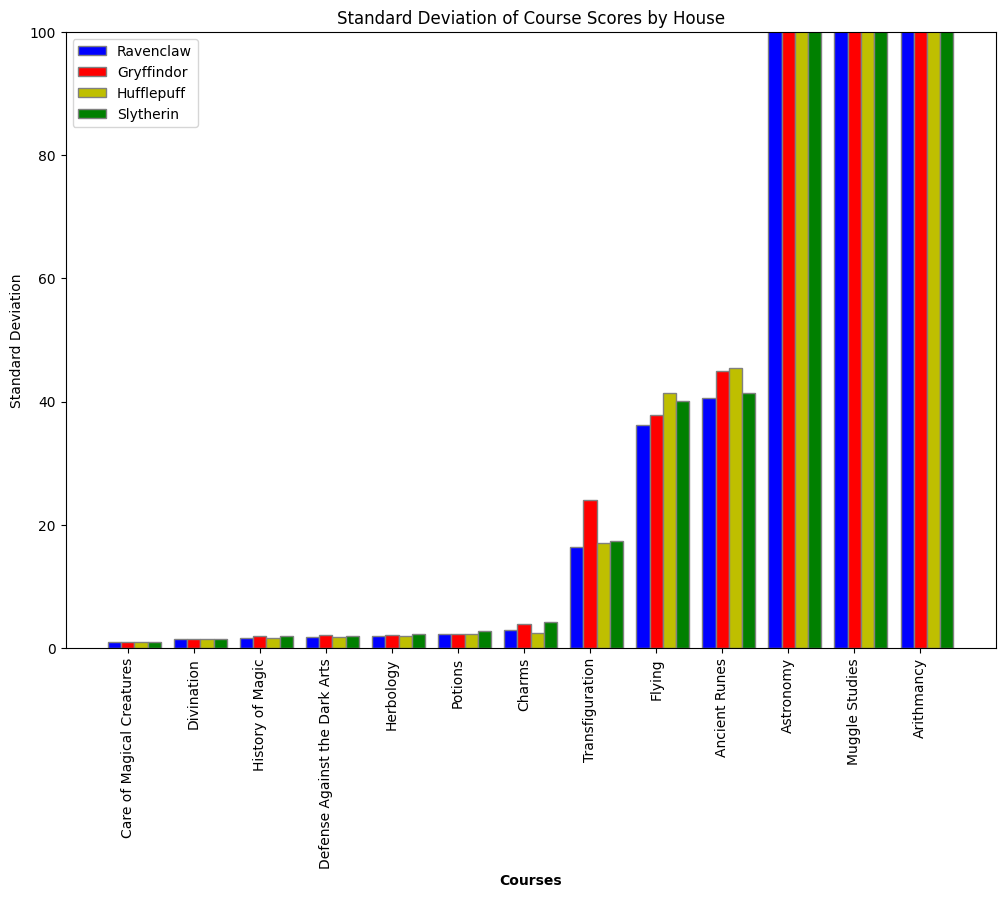

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2

courses = Ravenclaw_courses
r1 = range(len(Ravenclaw_metrics['std']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, Ravenclaw_metrics['std'], color='b', width=bar_width, edgecolor='grey', label='Ravenclaw')
plt.bar(r2, Gryffindor_metrics['std'], color='r', width=bar_width, edgecolor='grey', label='Gryffindor')
plt.bar(r3, Hufflepuff_metrics['std'], color='y', width=bar_width, edgecolor='grey', label='Hufflepuff')
plt.bar(r4, Slytherin_metrics['std'], color='g', width=bar_width, edgecolor='grey', label='Slytherin')

plt.xlabel('Courses', fontweight='bold')
plt.ylabel('Standard Deviation')
plt.xticks([r + bar_width for r in range(len(Ravenclaw_metrics['std']))], courses, rotation=90)
plt.title('Standard Deviation of Course Scores by House')
plt.ylim(0, 100) 
plt.legend()
plt.show()


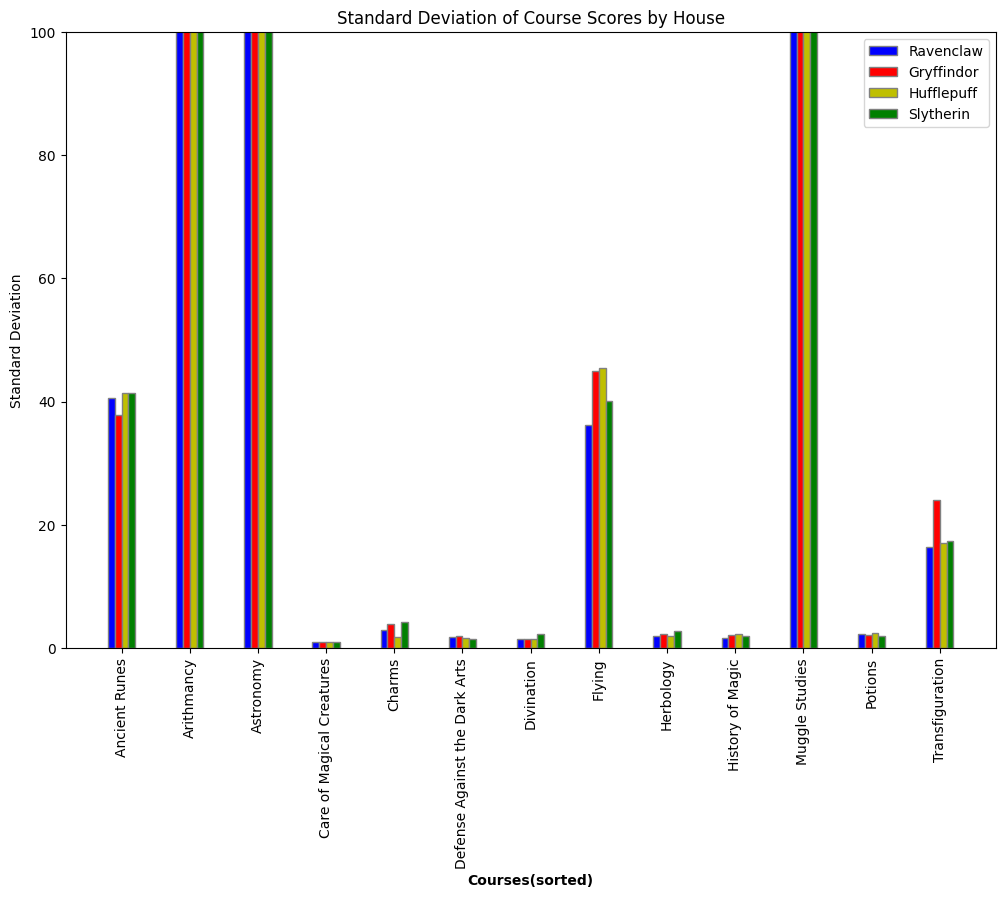

In [102]:
Ravenclaw_metrics.sort_index(inplace=True)
Gryffindor_metrics.sort_index(inplace=True)
Hufflepuff_metrics.sort_index(inplace=True)
Slytherin_metrics.sort_index(inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.1
r1 = range(len(Ravenclaw_metrics['std']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

ax.bar(r1, Ravenclaw_metrics['std'], color='b', width=bar_width, edgecolor='grey', label='Ravenclaw')
ax.bar(r2, Gryffindor_metrics['std'], color='r', width=bar_width, edgecolor='grey', label='Gryffindor')
ax.bar(r3, Hufflepuff_metrics['std'], color='y', width=bar_width, edgecolor='grey', label='Hufflepuff')
ax.bar(r4, Slytherin_metrics['std'], color='g', width=bar_width, edgecolor='grey', label='Slytherin')

courses = Ravenclaw_metrics.index 

ax.set_xlabel('Courses', fontweight='bold')
ax.set_ylabel('Standard Deviation')
ax.set_xticks([r + bar_width*1.5 for r in range(len(courses))])
ax.set_xticklabels(courses, rotation=90)
ax.set_title('Standard Deviation of Course Scores by House')
ax.set_ylim(0, 100) 

ax.legend()
plt.show()
